In [17]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

###
warnings.filterwarnings("ignore");

###
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
df = pd.read_csv('breast_cancer.csv')


In [19]:
df

,idno,clump,cellsize,cellshape,marginalad,ep_cellsize,nuclei,chromatin,nor_nuclei,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [34]:
X = df['clump'].values
y = df['class'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (dim,1) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(X_train[0])
    b = 0
    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))
  
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum = 0
    for i in range(len(y_true)):
        sum += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
    loss = -1 * (1 / len(y_true)) * sum
    return loss
  
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w,x) + b) - (alpha / N) * w)
    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w,x) + b)
    return db

def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    for i in range(epochs):
        train_pred = []
        test_pred = []
        for j in range(N):
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)
        for val in range(N):
            train_pred.append(sigmoid(np.dot(w, X_train[val]) + b))
            
        loss1 = logloss(y_train, train_pred)
        train_loss.append(loss1)
            
        for val in range(len(X_test)):
            test_pred.append(sigmoid(np.dot(w, X_test[val]) + b))
            
        loss2 = logloss(y_test, test_pred)
        test_loss.append(loss2)
        
    return w,b,train_loss,test_loss     

alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_log_loss,test_log_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

<function matplotlib.pyplot.show(close=None, block=None)>

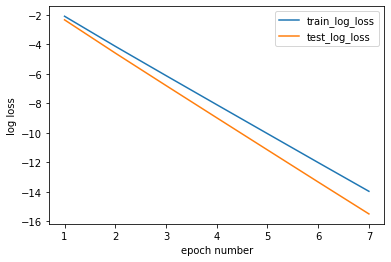

In [36]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,51,1)]

plt.plot(epoch,train_log_loss , label='train_log_loss')
plt.plot(epoch,test_log_loss, label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 15)

In [38]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

In [40]:
def initialize_weights(dim):
  # numpy.zeros_like function return an array of zeros with the same shape and type as a given array
  w = np.zeros_like(dim)
  b = 0
  return w, b

In [41]:
def sigmoid(z):
  return (1/ (1+np.exp(-z)))

In [42]:
def logloss(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)) 
  return log_loss

In [43]:
def gradient_dw(x, y, w, b, alpha, N):
  '''In this function, we will compute the gardient w.r.to w ''' 
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
  return dw

In [44]:
def gradient_db(x, y, w, b):
  '''In this function, we will compute gradient w.r.to b ''' 
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db

In [45]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0):
  w, b = initialize_weights(X_train[0])
  N = len(X_train)
  log_loss_train = []
  log_loss_test = []

  for i in range(0, epochs):

    for j in range(N):
      grad_dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, N)
      grad_db = gradient_db(X_train[j], y_train[j], w, b)
      w = np.array(w) + (eta0 * np.array(grad_dw))
      b = b + (eta0 * grad_db)

    # predict the output of x_train[for all data points in X_train] using w and b
    predict_train = []
    for m in range(len(y_train)):
        z = np.dot(w, X_train[m])+b
        predict_train.append(sigmoid(z)) 
    
    # store all the train loss values in a list
    train_loss = logloss(y_train, predict_train)

    # predict the output of x_test[for all data points in X_test] using w,b
    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, X_test[m])+b
        predict_test.append(sigmoid(z))
    
    # store all the test loss values in a list
    test_loss = logloss(y_test, predict_test)

    # we can also compare previous loss and current loss, 
    #if loss is not updating then stop the process and return w,b
    if log_loss_train and train_loss > log_loss_train[-1]: 
      return w, b, log_loss_train, log_loss_test 
    
    log_loss_train.append(train_loss)
    log_loss_test.append(test_loss)

  return w, b, log_loss_train, log_loss_test

In [46]:
alpha  = 0.0001
eta0   = 0.0001
epochs = 10
w, b, log_loss_train, log_loss_test = train(x_train_standard, y_train, 
                                            x_test_standard, y_test, epochs, 
                                            alpha, eta0)

In [47]:
print ("weight vector: ", w)
print ("Intercept: ", b)

weight vector:  [0.3340097]
Intercept:  1.0628908659437837


In [48]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(eta0 = 0.0001, loss='log', alpha=0.0001, 
              random_state=15, penalty='l2', tol=1e-3, 
              verbose=2, learning_rate='constant')
clf.fit(x_train_standard, y_train)
clf.coef_, clf.intercept_ 

-- Epoch 1
Norm: 0.02, NNZs: 1, Bias: -0.008942, T: 524, Avg. loss: 0.689461
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1, Bias: -0.017765, T: 1048, Avg. loss: 0.682168
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 1, Bias: -0.026477, T: 1572, Avg. loss: 0.675063
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1, Bias: -0.035078, T: 2096, Avg. loss: 0.668141
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.09, NNZs: 1, Bias: -0.043568, T: 2620, Avg. loss: 0.661397
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.10, NNZs: 1, Bias: -0.051945, T: 3144, Avg. loss: 0.654828
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 1, Bias: -0.060211, T: 3668, Avg. loss: 0.648428
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.13, NNZs: 1, Bias: -0.068372, T: 4192, Avg. loss: 0.642193
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.15, NNZs: 1, Bias: -0.076427, T: 4716, Avg. loss: 0.636117
Total training time

(array([[1.03367438]]), array([-0.52481561]))

<function matplotlib.pyplot.show(close=None, block=None)>

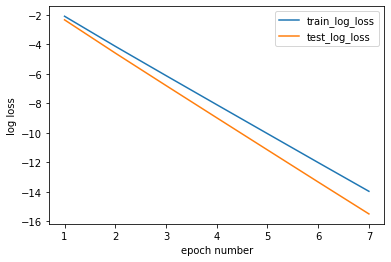

In [57]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,51,1)]

plt.plot(epoch,train_log_loss , label='train_log_loss')
plt.plot(epoch,test_log_loss, label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show